In [58]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import networkx as nx
from collections import defaultdict
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  

In [201]:
enhanced_Interaction_Customer_Transaction_Login = pd.read_csv("enhanced_customer_data.csv")

In [202]:
enhanced_Interaction_Customer_Transaction_Login

,CustomerID,Age,ChurnStatus,Zscore_Genderdiff,Zscore_Age_rangediff,Zscore_MaritalStatusdiff,Zscore_IncomeLeveldiff,Duration_Interation,Markov_Churn_prob,Gender_M,...,Rolling_7D_Clothing_bined_Rolling_7D_Clothing_150+,Rolling_7D_Clothing_bined_Rolling_7D_Clothing_40,LoginFrequency,DaysSinceLastLogin,LoginFrequency_Ratio,ServiceUsage_Online Banking,ServiceUsage_Website,LoginCategory_Medium,LoginCategory_High,LoginCategory_VeryHigh
0,1,62,0,21.898796,3.071478,0.860114,33.051301,0.0,0.192992,True,...,False,False,34,71,0.693878,False,False,False,True,False
1,2,65,1,21.898796,3.071478,38.161316,33.051301,0.0,0.192992,True,...,False,False,5,26,0.102041,False,True,False,False,False
2,3,18,0,21.898796,2.238200,0.860114,33.051301,0.0,0.192992,True,...,False,False,3,46,0.061224,False,True,False,False,False
3,4,21,0,21.898796,-17.033005,-14.640432,33.051301,138.0,0.192992,True,...,False,False,2,128,0.040816,False,True,False,False,False
4,5,21,0,21.898796,-17.033005,-30.394573,-9.421698,0.0,0.000000,True,...,False,False,41,65,0.836735,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,0,-23.096539,20.951841,0.860114,33.051301,0.0,0.000000,False,...,False,False,38,336,0.775510,False,False,False,True,False
996,997,19,0,21.898796,2.238200,-14.640432,-27.049698,0.0,0.000000,True,...,False,False,5,274,0.102041,False,False,False,False,False
997,998,47,0,21.898796,6.257337,38.161316,33.051301,0.0,0.000000,True,...,False,False,47,174,0.959184,False,True,False,False,True
998,999,23,0,21.898796,-17.033005,-14.640432,-27.049698,0.0,0.000000,True,...,False,False,23,357,0.469388,False,True,True,False,False


In [203]:
enhanced_Interaction_Customer_Transaction_Login.columns

Index(['CustomerID', 'Age', 'ChurnStatus', 'Zscore_Genderdiff',
       'Zscore_Age_rangediff', 'Zscore_MaritalStatusdiff',
       'Zscore_IncomeLeveldiff', 'Duration_Interation', 'Markov_Churn_prob',
       'Gender_M', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'IncomeLevel_Low', 'IncomeLevel_Medium',
       'Age_range_20-30', 'Age_range_30-40', 'Age_range_40-50',
       'Age_range_50-60', 'Age_range_60+', 'Rolling_7D_Sum',
       'Rolling_7D_0-200', 'Rolling_7D_200-400', 'Rolling_7D_400-600',
       'Rolling_7D_600+', 'Rolling_7D_Books', 'Rolling_7D_Clothing',
       'Rolling_7D_Electronics', 'Rolling_7D_Furniture',
       'Rolling_7D_Groceries',
       'Rolling_7D_Furniture_bined_Rolling_7D_Furniture_210',
       'Rolling_7D_Furniture_bined_Rolling_7D_Furniture_210+',
       'Rolling_7D_Electronics_bined_Rolling_7D_Electronics_310',
       'Rolling_7D_Electronics_bined_Rolling_7D_Electronics_360',
       'Rolling_7D_Electronics_bined_Rolling_7D_E

In [208]:
baseline_data = (enhanced_Interaction_Customer_Transaction_Login.copy()[['CustomerID', 'Age', 'ChurnStatus','Duration_Interation','Gender_M', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widowed', 'IncomeLevel_Low', 'IncomeLevel_Medium', 'Age_range_20-30', 'Age_range_30-40', 'Age_range_40-50', 'Age_range_50-60', 'Age_range_60+','LoginFrequency', 'DaysSinceLastLogin','ServiceUsage_Online Banking', 'ServiceUsage_Website', 'LoginCategory_Medium', 'LoginCategory_High', 'LoginCategory_VeryHigh']])

In [209]:
baseline_data.columns

Index(['CustomerID', 'Age', 'ChurnStatus', 'Duration_Interation', 'Gender_M',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'IncomeLevel_Low', 'IncomeLevel_Medium',
       'Age_range_20-30', 'Age_range_30-40', 'Age_range_40-50',
       'Age_range_50-60', 'Age_range_60+', 'LoginFrequency',
       'DaysSinceLastLogin', 'ServiceUsage_Online Banking',
       'ServiceUsage_Website', 'LoginCategory_Medium', 'LoginCategory_High',
       'LoginCategory_VeryHigh'],
      dtype='object')

In [210]:
X = baseline_data.drop(columns=["ChurnStatus"])
y = baseline_data["ChurnStatus"].astype(int)


for col in X.columns:
    try:
        X[col] = pd.to_numeric(X[col] , errors='ignore')  # 'ignore' 让非数值列保持不变
    except:
        print(f"无法转换 {col}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

xgb_model = XGBClassifier(
    n_estimators=100,       
    max_depth=10,           
    learning_rate=0.1,      
    random_state=42,
    use_label_encoder=False
    #obj=cost_sensitive_loss(fn_cost=50, fp_cost=1)
)



xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

report = classification_report(y_test, y_pred)
print("report:", report)

report:               precision    recall  f1-score   support

           0       0.79      0.91      0.85       239
           1       0.12      0.05      0.07        61

    accuracy                           0.74       300
   macro avg       0.46      0.48      0.46       300
weighted avg       0.65      0.74      0.69       300



/var/folders/pt/0nf2m3pj1f3b373wsyfc6glh0000gn/T/ipykernel_4884/4006064757.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X[col] = pd.to_numeric(X[col] , errors='ignore')  # 'ignore' 让非数值列保持不变
/Users/zheguan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:26:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [212]:


X = enhanced_Interaction_Customer_Transaction_Login.drop(columns=["ChurnStatus"])
y = enhanced_Interaction_Customer_Transaction_Login["ChurnStatus"].astype(int)


for col in X.columns:
    try:
        X[col] = pd.to_numeric(X[col] , errors='ignore')  # 'ignore' 让非数值列保持不变
    except:
        print(f"无法转换 {col}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



/var/folders/pt/0nf2m3pj1f3b373wsyfc6glh0000gn/T/ipykernel_4884/4119102381.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X[col] = pd.to_numeric(X[col] , errors='ignore')  # 'ignore' 让非数值列保持不变


In [62]:
def focal_loss(alpha, gamma):
    def focal_loss_func(y_pred, y_true):
        p_t = np.exp(-y_pred)
        loss = alpha * (1 - p_t) ** gamma * y_pred
        return "focal_loss", np.mean(loss)
    return focal_loss_func


In [231]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(enhanced_Interaction_Customer_Transaction_Login.drop(columns=["ChurnStatus"]), enhanced_Interaction_Customer_Transaction_Login["ChurnStatus"].astype(int)
, random_state=123)
mi_scores_df = pd.DataFrame({'Feature': enhanced_Interaction_Customer_Transaction_Login.drop(columns=["ChurnStatus"]).columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="MI Score", ascending=False)

print(mi_scores_df.head(40))

                                              Feature  MI Score
48                               ServiceUsage_Website  0.027484
23                                    Rolling_7D_600+  0.016073
10                               MaritalStatus_Single  0.013760
21                                 Rolling_7D_200-400  0.013751
4                            Zscore_MaritalStatusdiff  0.011622
29  Rolling_7D_Furniture_bined_Rolling_7D_Furnitur...  0.011460
11                              MaritalStatus_Widowed  0.010643
35       Rolling_7D_Books_bined_Rolling_7D_Books_220+  0.010439
33  Rolling_7D_Electronics_bined_Rolling_7D_Electr...  0.010176
6                                 Duration_Interation  0.006088
7                                   Markov_Churn_prob  0.005099
46                               LoginFrequency_Ratio  0.004567
3                                Zscore_Age_rangediff  0.002909
16                                    Age_range_40-50  0.002785
0                                       

In [213]:

X_with_target = X.copy()
X_with_target["ChurnStatus"] = y

correlation_matrix = X_with_target.corr()


relevant_features = mi_scores_df.head(24)['Feature']

print(relevant_features)
X = X[relevant_features]

# 划分训练集和测试集（保持类别比例）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# 选择数值特征
num_features = X.columns

# ==============================
# 2️⃣  标准化数据
# ==============================
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# ==============================
# 3️⃣  使用 PCA 进行降维
# ==============================
pca = PCA(n_components=0.90)  # 📌 保留 95% 以上的方差信息
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#X_train_pca = X_train # pca.fit_transform(X_train)
#X_test_pca = X_test #pca.transform(X_test)

print(f"📉 PCA 降维后特征数: {X_train_pca.shape[1]}")  # 看看降维后的特征数

# ==============================
# 4️⃣  使用 SMOTE 过采样
# ==============================

from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy=0.95, random_state=42)

#smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_pca, y_train)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)

# ==============================
# 5️⃣  训练 XGBoost
# ==============================
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # 计算类别权重比
xgb_model = XGBClassifier(
    n_estimators=100,       
    max_depth=20,           
    learning_rate=0.1,      
    scale_pos_weight=scale_pos_weight,  # 让模型更关注流失用户
    random_state=42,
    use_label_encoder=False,
    eval_metric=focal_loss(alpha=0.25, gamma=2.0),
    min_child_weight=1,
    #obj=cost_sensitive_loss(fn_cost=50, fp_cost=1)
)



# 训练模型
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred = xgb_model.predict(X_test_pca)

# 计算分类报告
report = classification_report(y_test, y_pred)
print("📊 分类报告:\n", report)

44                                       LoginFrequency
43     Rolling_7D_Clothing_bined_Rolling_7D_Clothing_40
50                                   LoginCategory_High
22                                   Rolling_7D_400-600
1                                                   Age
38    Rolling_7D_Groceries_bined_Rolling_7D_Grocerie...
5                                Zscore_IncomeLeveldiff
49                                 LoginCategory_Medium
19                                       Rolling_7D_Sum
28                                 Rolling_7D_Groceries
42    Rolling_7D_Clothing_bined_Rolling_7D_Clothing_...
2                                     Zscore_Genderdiff
11                                MaritalStatus_Widowed
7                                     Markov_Churn_prob
30    Rolling_7D_Furniture_bined_Rolling_7D_Furnitur...
47                          ServiceUsage_Online Banking
46                                 LoginFrequency_Ratio
32    Rolling_7D_Electronics_bined_Rolling_7D_El

/Users/zheguan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:28:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 分类报告:
               precision    recall  f1-score   support

           0       0.82      0.67      0.74       239
           1       0.25      0.43      0.32        61

    accuracy                           0.62       300
   macro avg       0.54      0.55      0.53       300
weighted avg       0.71      0.62      0.65       300



                                              Feature  MI Score
44                                     LoginFrequency  0.019718
43   Rolling_7D_Clothing_bined_Rolling_7D_Clothing_40  0.018506
50                                 LoginCategory_High  0.017478
22                                 Rolling_7D_400-600  0.012549
1                                                 Age  0.011778
38  Rolling_7D_Groceries_bined_Rolling_7D_Grocerie...  0.011021
5                              Zscore_IncomeLeveldiff  0.009676
49                               LoginCategory_Medium  0.009565
19                                     Rolling_7D_Sum  0.008970
28                               Rolling_7D_Groceries  0.008315
42  Rolling_7D_Clothing_bined_Rolling_7D_Clothing_...  0.008285
2                                   Zscore_Genderdiff  0.007211
11                              MaritalStatus_Widowed  0.006836
7                                   Markov_Churn_prob  0.004902
30  Rolling_7D_Furniture_bined_Rolling_7

In [144]:
mi_scores_df.head(24)['Feature']

44                                       LoginFrequency
43     Rolling_7D_Clothing_bined_Rolling_7D_Clothing_40
50                                   LoginCategory_High
22                                   Rolling_7D_400-600
1                                                   Age
38    Rolling_7D_Groceries_bined_Rolling_7D_Grocerie...
5                                Zscore_IncomeLeveldiff
49                                 LoginCategory_Medium
19                                       Rolling_7D_Sum
28                                 Rolling_7D_Groceries
42    Rolling_7D_Clothing_bined_Rolling_7D_Clothing_...
2                                     Zscore_Genderdiff
11                                MaritalStatus_Widowed
7                                     Markov_Churn_prob
30    Rolling_7D_Furniture_bined_Rolling_7D_Furnitur...
47                          ServiceUsage_Online Banking
46                                 LoginFrequency_Ratio
32    Rolling_7D_Electronics_bined_Rolling_7D_El

In [161]:
from ctgan import CTGAN
import pandas as pd
from tqdm import tqdm  # 引入进度条
import time

os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
# ==============================
# 1️⃣  加载原始数据
# ==============================
data = enhanced_Interaction_Customer_Transaction_Login.copy()

# ==============================
# 2️⃣  选择需要增强的数据（可选择 ChurnStatus = 1 的数据）
# ==============================
data_to_augment = data[data['ChurnStatus'] == 1]  # 只增强流失用户数据
num_samples = len(data_to_augment) * 5  # 生成五倍的流失数据

# ==============================
# 3️⃣  训练 CTGAN 模型（添加进度条）
# ==============================
epochs = 50  # 训练 300 轮

# 创建 CTGAN 模型
ctgan = CTGAN(epochs=epochs, batch_size=500, verbose=False)  

# 使用 tqdm 包装训练过程
print("Training CTGAN...")
for epoch in tqdm(range(epochs), desc="CTGAN Training Progress"):
    
    ctgan.fit(data_to_augment)  

print("CTGAN Training Complete!")

# ==============================
# 4️⃣  生成新的合成数据
# ==============================
print("🔄 Generating synthetic data...")
new_data = ctgan.sample(num_samples)

# 确保数据类型匹配
for col in data_to_augment.columns:
    if col in new_data.columns:
        new_data[col] = new_data[col].astype(data_to_augment[col].dtype)

print("✅ Synthetic Data Generated!")

# ==============================
# 5️⃣  合并合成数据和原始数据
# ==============================
augmented_data = pd.concat([data, new_data], ignore_index=True)

# ==============================
# 6️⃣  重新训练机器学习模型
# ==============================
X = augmented_data.drop(columns=["ChurnStatus"])
y = augmented_data["ChurnStatus"]

# 进行训练和测试集拆分
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 训练 XGBoost
from xgboost import XGBClassifier
print("🎯 Training XGBoost Model...")
model = XGBClassifier(n_estimators=1000, max_depth=10, learning_rate=0.01, random_state=42)
model.fit(X_train, y_train)
print("✅ XGBoost Training Complete!")

# 预测
y_pred = model.predict(X_test)

# 计算分类报告
from sklearn.metrics import classification_report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))


Training CTGAN...


CTGAN Training Progress: 100%|██████████████████| 50/50 [03:22<00:00,  4.05s/it]


CTGAN Training Complete!
🔄 Generating synthetic data...
✅ Synthetic Data Generated!
🎯 Training XGBoost Model...
✅ XGBoost Training Complete!
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       159
           1       0.93      0.81      0.87       245

    accuracy                           0.85       404
   macro avg       0.84      0.86      0.85       404
weighted avg       0.86      0.85      0.85       404



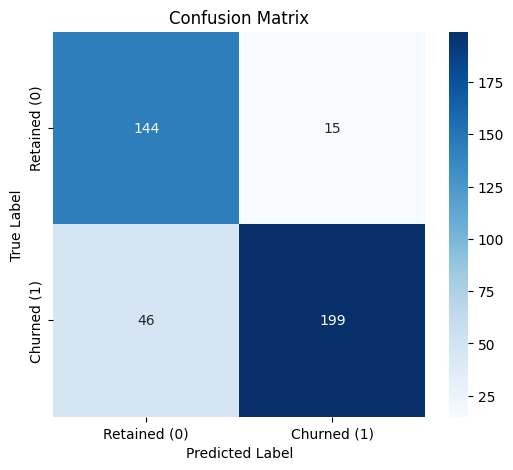

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 预测类别
y_pred = model.predict(X_test)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Retained (0)", "Churned (1)"], yticklabels=["Retained (0)", "Churned (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


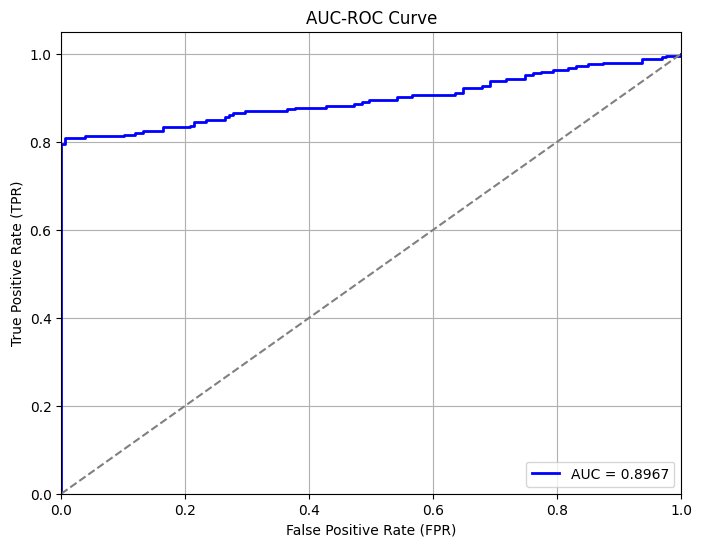

In [163]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 计算预测概率（取类别 1）
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算 ROC 曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# 计算 AUC
roc_auc = auc(fpr, tpr)

# 画图
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # 参考线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC-ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
from ctgan import CTGAN
import pandas as pd
from tqdm import tqdm  # 引入进度条
import time

os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
# ==============================
# 1️⃣  加载原始数据
# ==============================
data = enhanced_Interaction_Customer_Transaction_Login.copy()

# ==============================
# 2️⃣  选择需要增强的数据（可选择 ChurnStatus = 1 的数据）
# ==============================
data_to_augment = data[data['ChurnStatus'] == 1]  # 只增强流失用户数据
num_samples = len(data_to_augment) * 5  # 生成五倍的流失数据

# ==============================
# 3️⃣  训练 CTGAN 模型（添加进度条）
# ==============================
epochs = 50  # 训练 300 轮

# 创建 CTGAN 模型
ctgan = CTGAN(epochs=epochs, batch_size=500, verbose=False)  

# 使用 tqdm 包装训练过程
print("Training CTGAN...")
for epoch in tqdm(range(epochs), desc="CTGAN Training Progress"):
    
    ctgan.fit(data_to_augment)  

print("CTGAN Training Complete!")

# ==============================
# 4️⃣  生成新的合成数据
# ==============================
print("🔄 Generating synthetic data...")
new_data = ctgan.sample(num_samples)

# 确保数据类型匹配
for col in data_to_augment.columns:
    if col in new_data.columns:
        new_data[col] = new_data[col].astype(data_to_augment[col].dtype)

print("✅ Synthetic Data Generated!")

# ==============================
# 5️⃣  合并合成数据和原始数据
# ==============================
augmented_data = pd.concat([data, new_data], ignore_index=True)

# ==============================
# 6️⃣  重新训练机器学习模型
# ==============================
X = augmented_data.drop(columns=["ChurnStatus"])
y = augmented_data["ChurnStatus"]

# 进行训练和测试集拆分
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 训练 XGBoost
from xgboost import XGBClassifier
print("🎯 Training XGBoost Model...")
model = XGBClassifier(n_estimators=1000, max_depth=10, learning_rate=0.01, random_state=42)
model.fit(X_train, y_train)
print("✅ XGBoost Training Complete!")

# 预测
y_pred = model.predict(X_test)

# 计算分类报告
from sklearn.metrics import classification_report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))


In [188]:
from ctgan import CTGAN
import pandas as pd
from tqdm import tqdm  # 进度条
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# ==============================
# 1️⃣  加载数据 & 拆分 Train/Test
# ==============================
data = enhanced_Interaction_Customer_Transaction_Login.copy()

# **拆分训练集和测试集**
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=["ChurnStatus"]),
    data["ChurnStatus"],
    test_size=0.2,  # 保持 20% 作为测试集
    random_state=42,
    stratify=data["ChurnStatus"]
)

# **只增强训练集中的 ChurnStatus=1 数据**
train_data = X_train.copy()
train_data["ChurnStatus"] = y_train  # 重新合并标签

data_to_augment = train_data[train_data['ChurnStatus'] == 1]  # 只增强流失用户数据
num_samples = len(data_to_augment) * 5  # 生成两倍的流失数据

# ==============================
# 2️⃣  训练 CTGAN 模型
# ==============================
print("Training CTGAN...")

epochs = 100  # 训练 50 轮
ctgan = CTGAN(epochs=epochs, batch_size=500, verbose=False)

# 使用 tqdm 包装训练过程
for epoch in tqdm(range(epochs), desc="CTGAN Training Progress"):
    ctgan.fit(data_to_augment)

print("✅ CTGAN Training Complete!")

# ==============================
# 3️⃣  生成新的合成数据
# ==============================
print("🔄 Generating synthetic data...")
new_data = ctgan.sample(num_samples)

# **确保数据类型匹配**
for col in data_to_augment.columns:
    if col in new_data.columns:
        new_data[col] = new_data[col].astype(data_to_augment[col].dtype)

print("✅ Synthetic Data Generated!")

# ==============================
# 4️⃣  合并增强后的训练数据
# ==============================
augmented_train_data = pd.concat([train_data, new_data], ignore_index=True)

X_train_augmented = augmented_train_data.drop(columns=["ChurnStatus"])
y_train_augmented = augmented_train_data["ChurnStatus"]

# **测试集保持不变**
X_test_final = X_test.copy()
y_test_final = y_test.copy()

# ==============================
# 5️⃣  训练 XGBoost
# ==============================
print("🎯 Training XGBoost Model...")



Training CTGAN...


CTGAN Training Progress: 100%|████████████████| 100/100 [11:22<00:00,  6.83s/it]

✅ CTGAN Training Complete!
🔄 Generating synthetic data...
✅ Synthetic Data Generated!
🎯 Training XGBoost Model...


In [196]:
model = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.003, random_state=42)
model.fit(X_train_augmented, y_train_augmented)  # 训练增强后的数据
print("✅ XGBoost Training Complete!")

# ==============================
# 6️⃣  在 **原始测试集** 上评估
# ==============================
y_pred = model.predict(X_test_final)

print("📊 Classification Report:")
print(classification_report(y_test_final, y_pred))

✅ XGBoost Training Complete!
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.50      0.62       159
           1       0.24      0.61      0.34        41

    accuracy                           0.52       200
   macro avg       0.53      0.55      0.48       200
weighted avg       0.71      0.52      0.56       200



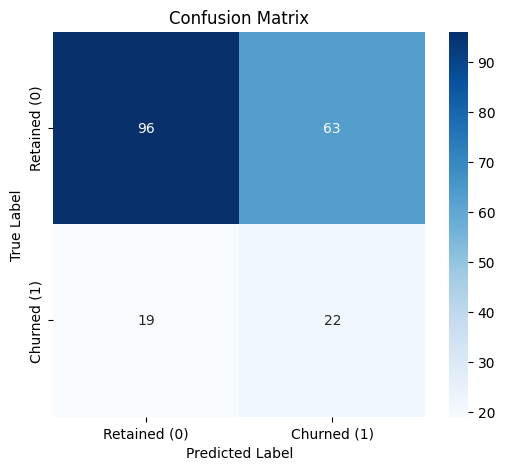

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 预测类别
y_pred = model.predict(X_test_final)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Retained (0)", "Churned (1)"], yticklabels=["Retained (0)", "Churned (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 计算预测概率（取类别 1）
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算 ROC 曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# 计算 AUC
roc_auc = auc(fpr, tpr)

# 画图
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # 参考线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC-ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


ValueError: feature_names mismatch: ['CustomerID', 'Age', 'Zscore_Genderdiff', 'Zscore_Age_rangediff', 'Zscore_MaritalStatusdiff', 'Zscore_IncomeLeveldiff', 'Duration_Interation', 'Markov_Churn_prob', 'Gender_M', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widowed', 'IncomeLevel_Low', 'IncomeLevel_Medium', 'Age_range_20-30', 'Age_range_30-40', 'Age_range_40-50', 'Age_range_50-60', 'Age_range_60+', 'Rolling_7D_Sum', 'Rolling_7D_0-200', 'Rolling_7D_200-400', 'Rolling_7D_400-600', 'Rolling_7D_600+', 'Rolling_7D_Books', 'Rolling_7D_Clothing', 'Rolling_7D_Electronics', 'Rolling_7D_Furniture', 'Rolling_7D_Groceries', 'Rolling_7D_Furniture_bined_Rolling_7D_Furniture_210', 'Rolling_7D_Furniture_bined_Rolling_7D_Furniture_210+', 'Rolling_7D_Electronics_bined_Rolling_7D_Electronics_310', 'Rolling_7D_Electronics_bined_Rolling_7D_Electronics_360', 'Rolling_7D_Electronics_bined_Rolling_7D_Electronics_440', 'Rolling_7D_Electronics_bined_Rolling_7D_Electronics_440+', 'Rolling_7D_Books_bined_Rolling_7D_Books_220+', 'Rolling_7D_Books_bined_Rolling_7D_Books_80', 'Rolling_7D_Groceries_bined_Rolling_7D_Groceries_280', 'Rolling_7D_Groceries_bined_Rolling_7D_Groceries_320', 'Rolling_7D_Groceries_bined_Rolling_7D_Groceries_380', 'Rolling_7D_Groceries_bined_Rolling_7D_Groceries_410+', 'Rolling_7D_Groceries_bined_Rolling_7D_Groceries_80', 'Rolling_7D_Clothing_bined_Rolling_7D_Clothing_150+', 'Rolling_7D_Clothing_bined_Rolling_7D_Clothing_40', 'LoginFrequency', 'DaysSinceLastLogin', 'LoginFrequency_Ratio', 'ServiceUsage_Online Banking', 'ServiceUsage_Website', 'LoginCategory_Medium', 'LoginCategory_High', 'LoginCategory_VeryHigh'] ['CustomerID', 'Age', 'Zscore_Genderdiff', 'Zscore_Age_rangediff', 'Zscore_MaritalStatusdiff', 'Zscore_IncomeLeveldiff', 'Duration_Interation', 'Markov_Churn_prob', 'Gender_M', 'MaritalStatus_Married', 'MaritalStatus_Widowed', 'IncomeLevel_Low', 'IncomeLevel_Medium', 'Age_range_20-30', 'Age_range_30-40', 'Age_range_40-50', 'Age_range_50-60', 'Age_range_60+', 'Rolling_7D_Sum', 'Rolling_7D_0-200', 'Rolling_7D_200-400', 'Rolling_7D_400-600', 'Rolling_7D_600+', 'Rolling_7D_Books', 'Rolling_7D_Clothing', 'Rolling_7D_Electronics', 'Rolling_7D_Groceries', 'Rolling_7D_Furniture_bined_Rolling_7D_Furniture_210', 'Rolling_7D_Furniture_bined_Rolling_7D_Furniture_210+', 'Rolling_7D_Electronics_bined_Rolling_7D_Electronics_310', 'Rolling_7D_Electronics_bined_Rolling_7D_Electronics_360', 'Rolling_7D_Electronics_bined_Rolling_7D_Electronics_440', 'Rolling_7D_Books_bined_Rolling_7D_Books_220+', 'Rolling_7D_Books_bined_Rolling_7D_Books_80', 'Rolling_7D_Groceries_bined_Rolling_7D_Groceries_320', 'Rolling_7D_Groceries_bined_Rolling_7D_Groceries_380', 'Rolling_7D_Groceries_bined_Rolling_7D_Groceries_410+', 'Rolling_7D_Groceries_bined_Rolling_7D_Groceries_80', 'Rolling_7D_Clothing_bined_Rolling_7D_Clothing_150+', 'Rolling_7D_Clothing_bined_Rolling_7D_Clothing_40', 'LoginFrequency', 'DaysSinceLastLogin', 'LoginFrequency_Ratio', 'ServiceUsage_Online Banking', 'ServiceUsage_Website', 'LoginCategory_Medium', 'LoginCategory_High', 'LoginCategory_VeryHigh']
expected Rolling_7D_Furniture, MaritalStatus_Single, Rolling_7D_Groceries_bined_Rolling_7D_Groceries_280, Rolling_7D_Electronics_bined_Rolling_7D_Electronics_440+ in input data

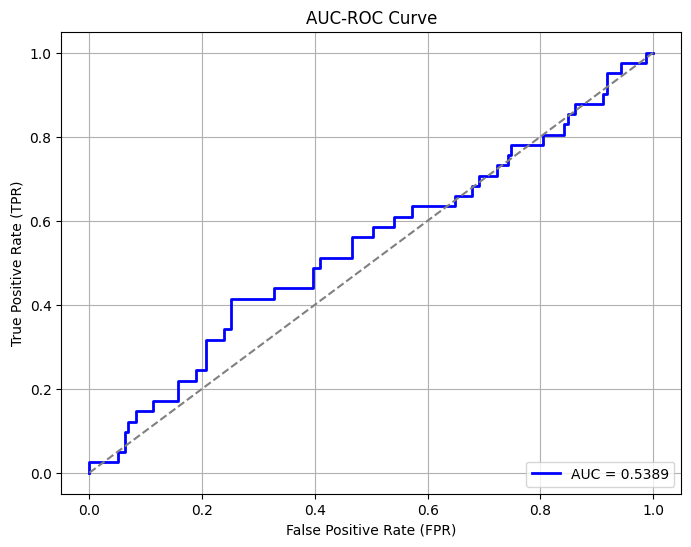

In [96]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 计算预测概率
y_pred_proba = xgb_model.predict_proba(X_test_pca)[:, 1]

# 计算ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 随机分类器的参考线
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC-ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


/var/folders/pt/0nf2m3pj1f3b373wsyfc6glh0000gn/T/ipykernel_4884/3750718118.py:26: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X[col] = pd.to_numeric(X[col], errors='ignore')  # 'ignore' 让非数值列保持不变


44                                       LoginFrequency
43     Rolling_7D_Clothing_bined_Rolling_7D_Clothing_40
50                                   LoginCategory_High
22                                   Rolling_7D_400-600
1                                                   Age
38    Rolling_7D_Groceries_bined_Rolling_7D_Grocerie...
5                                Zscore_IncomeLeveldiff
49                                 LoginCategory_Medium
19                                       Rolling_7D_Sum
28                                 Rolling_7D_Groceries
42    Rolling_7D_Clothing_bined_Rolling_7D_Clothing_...
2                                     Zscore_Genderdiff
11                                MaritalStatus_Widowed
7                                     Markov_Churn_prob
30    Rolling_7D_Furniture_bined_Rolling_7D_Furnitur...
47                          ServiceUsage_Online Banking
46                                 LoginFrequency_Ratio
32    Rolling_7D_Electronics_bined_Rolling_7D_El

/Users/zheguan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:02:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Training SVM...
📌 Training KNN...


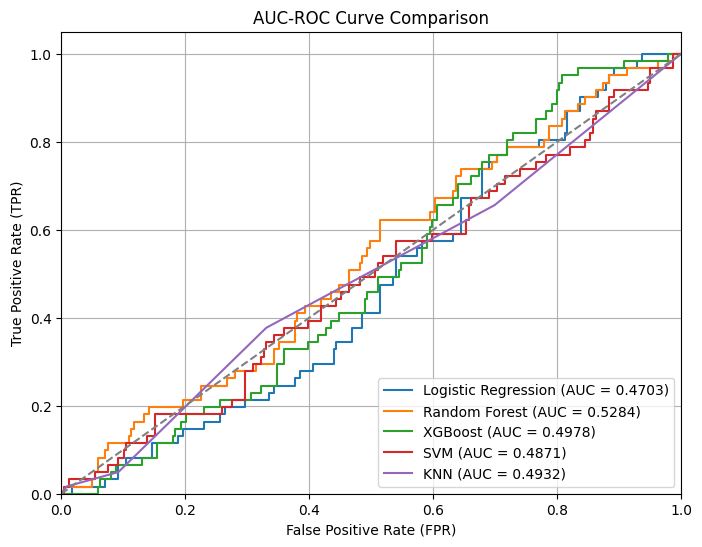


📊 **Final Model Performance Comparison:**


ModuleNotFoundError: No module named 'ace_tools'

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# ==============================
# 1️⃣  加载数据 & 预处理
# ==============================
X = enhanced_Interaction_Customer_Transaction_Login.drop(columns=["ChurnStatus"])
y = enhanced_Interaction_Customer_Transaction_Login["ChurnStatus"].astype(int)

# 处理时间变量


# 确保数值化
for col in X.columns:
    try:
        X[col] = pd.to_numeric(X[col], errors='ignore')  # 'ignore' 让非数值列保持不变
    except:
        print(f"无法转换 {col}")

# 划分训练集和测试集
X_with_target = X.copy()
X_with_target["ChurnStatus"] = y

#X_with_target = pd.get_dummies(X_with_target, columns=["Gender", "MaritalStatus", "IncomeLevel", "Age_range"], drop_first=True).astype(int)

# 计算相关性矩阵
correlation_matrix = X_with_target.corr()

# 选择相关性大于 0.02 的特征（排除 ChurnStatus 自身）
relevant_features = mi_scores_df.head(24)['Feature']
#relevant_features = correlation_matrix[abs(correlation_matrix["ChurnStatus"]) > 0.0001].index.tolist()
#relevant_features.remove("ChurnStatus")  # 移除目标变量自身
print(relevant_features)
X = X[relevant_features]

# 划分训练集和测试集（保持类别比例）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# 归一化（标准化）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================
# 2️⃣  训练不同的机器学习模型
# ==============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=500, max_depth=10, learning_rate=0.01, random_state=42, use_label_encoder=False, eval_metric="logloss"),
    "SVM": SVC(probability=True, kernel="rbf"),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    print(f"📌 Training {name}...")
    
    # 训练模型
    model.fit(X_train_scaled, y_train)
    
    # 预测概率
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # 计算 AUC-ROC
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    # 计算 ROC 曲线
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    
    # 计算准确率
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    results[name] = {"AUC": auc_score, "Accuracy": acc}
    
    # 画 AUC-ROC 曲线
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.4f})")

# 画参考线
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")

# ROC 图像美化
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC-ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# ==============================
# 3️⃣  显示最终对比结果
# ==============================
results_df = pd.DataFrame(results).T
print("\n📊 **Final Model Performance Comparison:**")
import ace_tools as tools
tools.display_dataframe_to_user(name="Model Performance Comparison", dataframe=results_df)
